In [1]:
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import time
import numpy as np
import pandas as pd

#SKlearn
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




import matplotlib.pyplot as plt
# import plotly_express as px
import tqdm
import pickle
from tqdm._tqdm_notebook import tqdm_notebook


#Heat Map
import geopandas as gpd
#import descartes
from shapely.geometry import Point, Polygon
from mpl_toolkits.basemap import Basemap
# #import geoplot as gplt
# import geoplot.crs as gcrs
# import matplotlib.pyplot as plt



/var/folders/bg/b5dfn0gj1lz88k7ms283yrlm0000gn/T/ipykernel_2678/2955768965.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [67]:
gdf = gpd.read_file('./data/0.geojson')
gdf.to_file('./data/file.shp')

/var/folders/bg/b5dfn0gj1lz88k7ms283yrlm0000gn/T/ipykernel_6584/2419270614.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('file.shp')


<AxesSubplot:>

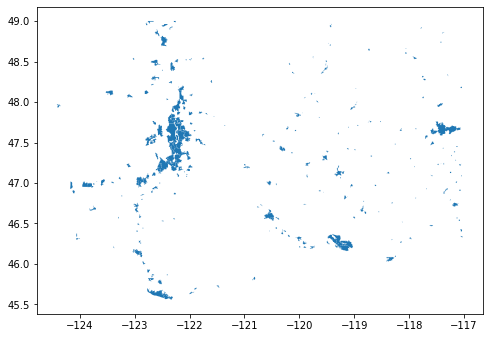

In [70]:
map_df = gpd.read_file('file.shp')
map_df.plot(figsize=(8,8))

/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:xlabel='lon', ylabel='lat'>

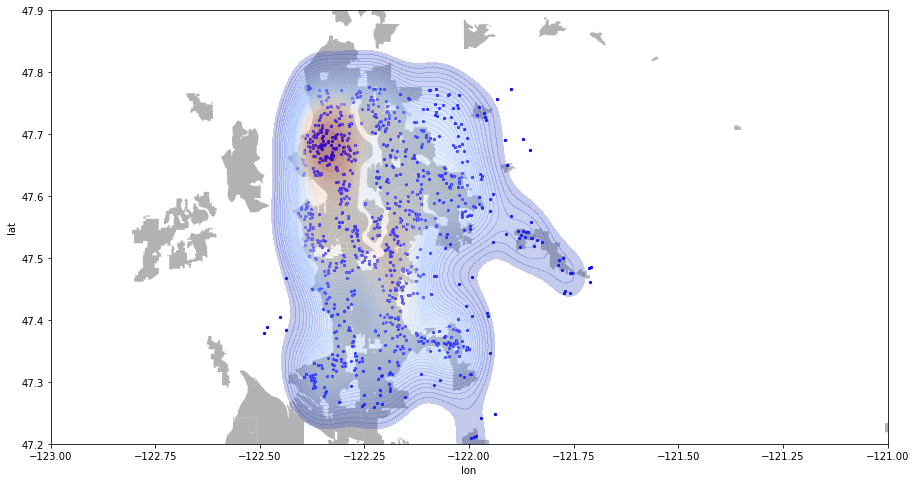

In [93]:
street_map = gpd.read_file('file.shp')

fig, ax = plt.subplots(figsize=(15,15))

street_map.plot(ax=ax, color="grey", alpha=0.6)

crs = {"init":"epsg:4326"}

geometry = [Point(xy) for xy in zip(df["lon"], df["lat"])]

geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

geo_df.plot(ax = ax, markersize = 5, color = "blue", marker = "o", label = "POI")
xlim = ([-123,  -121])
ylim = ([47.2,  47.9])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

import seaborn as sns
sns.kdeplot(data=df, x='lon', y='lat', fill=True,\
            cmap='coolwarm',\
            alpha=0.3, \
            gridsize=100, \
            levels=50, \
            ax=ax)

In [94]:
# Load processed data
with open('Data_frame_geoloc.pickle', 'rb') as df_geo_data:
    df_geo = pickle.load(df_geo_data)
    

In [13]:
df = df_geo.iloc[0:1000]

In [99]:
df_geo["state"].value_counts()

Washington    21597
Name: state, dtype: int64

In [71]:
df

,id,lat,price,yr_built,sqft_living,sqft_lot,lon,To_drop_place_ID,To_drop_road,Type_place,city,county,state,suburb
0,7129300520,47.5112,221900.0,1955,1180,5650,-122.257,159583259.0,61st Avenue South,city,Seattle,King County,Washington,NaN
1,6414100192,47.7210,538000.0,1951,2570,7242,-122.319,159668720.0,Northeast 127th Street,city,Seattle,King County,Washington,Northgate
2,5631500400,47.7379,180000.0,1933,770,10000,-122.233,74808506.0,81st Avenue Northeast,town,Kenmore,King County,Washington,Moorlands
3,2487200875,47.5208,604000.0,1965,1960,5000,-122.393,156392831.0,Fauntleroy Way Southwest,city,Seattle,King County,Washington,Fauntleroy
4,1954400510,47.6168,510000.0,1987,1680,8080,-122.045,293729110.0,221st Avenue Northeast,town,Sammamish,King County,Washington,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8856004730,47.2786,199950.0,1920,1590,20917,-122.250,231805148.0,Milwaukee Boulevard South,village,Algona,King County,Washington,NaN
996,3856902996,47.6707,553500.0,1922,850,2340,-122.328,158635040.0,Northeast 58th Street,city,Seattle,King County,Washington,Green Lake
997,1442800370,47.3738,189950.0,1981,1030,4188,-122.057,220244626.0,213th Avenue Southeast,town,Maple Valley,King County,Washington,Wilderness
998,8001400340,47.3225,289000.0,1988,1850,9550,-122.273,231519296.0,49th Avenue South,town,Auburn,King County,Washington,West Hill


In [60]:
Geo_columns_basic_all = ["Type_place", "city","county", "state"]
Geo_columns_basic_type = ["Type_place", "county", "state"]
Geo_columns_basic_city_names = ["city","county", "state"]
Geo_columns_advanced = ["suburb"]
Geo_columns_drop = ["To_drop_place_ID", "To_drop_road"]

In [52]:
X_geo = df[Geo_columns_basic]


In [53]:
# setup One Hot Encoder 
encoder_geo_basic = OneHotEncoder(handle_unknown = "ignore")
encoder_geo_basic.fit(X_geo)


OneHotEncoder(handle_unknown='ignore')

In [54]:
# Prepare transformed dataset
X_geo_transf=encoder_geo_basic.transform(X_geo)
X_geo_df=pd.DataFrame(X_geo_transf.todense(), columns = encoder_geo_basic.get_feature_names())


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [59]:
# Work with polynomial features
poly=PolynomialFeatures(2)

In [55]:
# Price model example
X_geo_df["Price"]= df["price"]

linreg = LinearRegression()
linreg.fit(X_geo_df.drop("Price", axis = 1), X_geo_df["Price"])

y_hat = linreg.predict(X_geo_df.drop("Price", axis = 1))
print(mean_squared_error(X_geo_df["Price"],y_hat))
print(r2_score(X_geo_df["Price"], y_hat))

#74261012404.80319
#0.3539623751720482


74324905309.078
0.35340653545502343
